We depend on this sync_lib library that is one folder above

In [140]:
import sys
sys.path.append('../')

In [141]:
from sync_lib import Dataset
import matplotlib.pylab as plt
import numpy as np

Path to relevant sync file

In [142]:
path = "2021T135255.h5"


In [143]:
dset = Dataset(path)

Here we plot the period of stimulus rendering, driving photo-diode and photo-diode response time after screen flipping

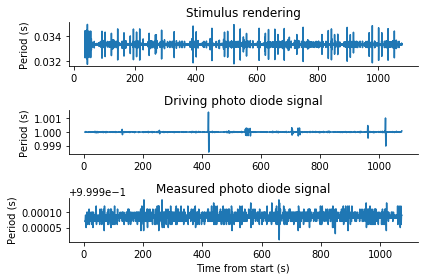

In [148]:

# This is the fastest output from bonsai to digital line
times_bonsai_fast_sync = dset.get_rising_edges('vsync_stim', units='sec')[1000:-300]

# This is the driving signal behind the photodiode
times_bonsai_driving_photodiode = dset.get_rising_edges(
    'stim_running', units='sec')[0:-10]

times_photodiode = dset.get_rising_edges('stim_photodiode', units='sec')[:-10]

plt.subplot(3, 1, 1)
plt.plot(times_bonsai_fast_sync[1:], np.diff(times_bonsai_fast_sync))
plt.ylabel('Period (s)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('Stimulus rendering')

plt.subplot(3, 1, 2)
plt.plot(times_bonsai_driving_photodiode[1:], np.diff(
    times_bonsai_driving_photodiode))
plt.ylabel('Period (s)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('Driving photo diode signal')

plt.subplot(3, 1, 3)
plt.plot(times_photodiode[1:], np.diff(
    times_photodiode))
plt.xlabel('Time from start (s)')
plt.ylabel('Period (s)')
plt.title('Measured photo diode signal')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig('2021-05-12-passively_viewing_run1.png')


This is to dive further into photodiode signal and visualize the stability of the photodiode period after flipping

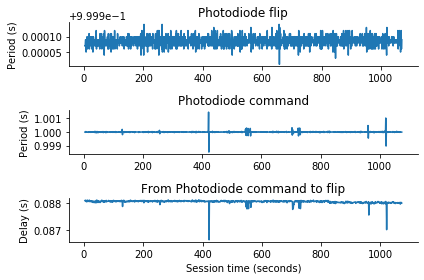

In [149]:

# We cut the end that is related to aborting a process mid-way
times_command = dset.get_rising_edges('stim_running', units='sec')[0:-10]
times_response = dset.get_rising_edges('stim_photodiode', units='sec')[0:-10]

plt.subplot(3, 1, 1)
plt.plot(times_response[:-2], np.diff(times_response[:-1]))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylabel('Period (s)')
plt.title('Photodiode flip')

plt.subplot(3, 1, 2)
plt.plot(times_command[:-2], np.diff(times_command[:-1]))
plt.ylabel('Period (s)')
plt.title('Photodiode command')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.subplot(3, 1, 3)
plt.plot(times_response[:], times_response[:]-times_command[:times_response.shape[0]])

plt.ylabel('Delay (s)')
plt.xlabel('Session time (seconds)')
plt.title('From Photodiode command to flip')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tight_layout()